## What's the probability?
__Problem:__

You pick any integer between 1 and 32. You are then allowed to randomly draw 6 unique integers between 1 and 32. What's the probability that you successfully pulled your own number?

In [112]:
# Basic Python Libs
import numpy as np
import math
import random
from scipy import stats
from itertools import combinations
from matplotlib import pyplot as plt

You can approach this problem in many different ways. I'll stick to the one I find simplest. Also I'll start off with the simplest version of this problem and slowly scale it up.

So the general problem is to find the probability $p_{hit}$ to find a picked number $n_{pick}$ in a pool of a certain number of unique drawn numbers $N_{drawn}$ with a size of $N_{pool}$ out of a total pool of numbers with length $N_{total}$.

Since we draw unique numbers, we know that: $N_{pool}\,<=\,N_{total}$.  
If $N_{pool}=N_{total}$, then we know that $p_{hit}=1$ must be true.

MATH $...$

Solution: $\frac{N_{pool}}{N_{total}}$

Example: $\frac{6}{32} = \frac{3}{16} = 0.1875$

In [113]:
# range stop is not included
def random_pull(range_start, range_stop, pull_number):
    sample = range(range_start, range_stop)
    return random.sample(sample, pull_number)

def how_many_hits(target, pulls, range_start, range_stop, pull_number):
    if ((target > range_stop-1) | (target < range_start)):
        print("Target number must be in pull range!")
        return 0
    sample_draws = []
    target_hits = 0
    for k in range(pulls):
        sample_draws.append(random_pull(range_start, range_stop, pull_number))
    for draw in sample_draws:
        if target in draw:
            target_hits += 1
    sample_length = len(sample_draws)
    return float(100*target_hits/sample_length)

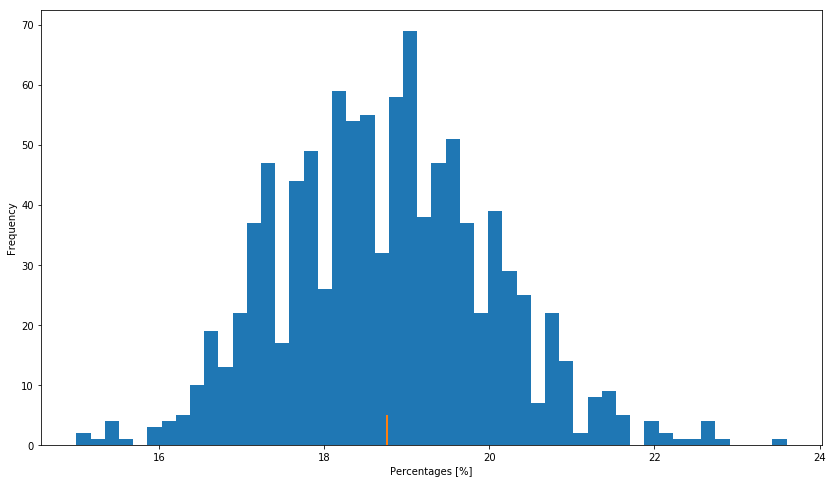

The probability to hit your number is approximately (18.752 +/- 0.041)%.


In [114]:
result_list = []
for tries in range(1000):
    result_list.append(how_many_hits(32, 1000, 1, 33, 6))
  
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)    
ax.hist(result_list, bins=50)
ax.hist([np.average(result_list)]*5, bins=50)
plt.xlabel('Percentages [%]')
plt.ylabel('Frequency')
plt.show()
print("The probability to hit your number is approximately ({0:.3f}".format(np.average(result_list)) + " +/- {0:.3f})%.".format(stats.sem(result_list)))